# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Muhammad Tito Jaya Kusuma
- **Email:** muhtito2505@gmail.com
- **ID Dicoding:** titojayaaaa

## Menentukan Pertanyaan Bisnis

- Apakah ketika cuaca hujan mengurangi jumlah polutan kotor dan meningkatkan jumlah polutan bersih?
- Bagaimana Peningkatan Frequency Rata-rata PM2.5 di sekitar Sebulan Terakhir, 6 bulan terakhir, 1 tahun terakhir, 5 tahun terakhir
- Bagaimana Peningkatan Frequency Rata-rata PM10 di sekitar Sebulan Terakhir, 6 bulan terakhir, 1 tahun terakhir, 5 tahun terakhir
- Bulan apa yang memiliki jumlah polutan (SO2,NO2,CO,O3) tertinggi

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [2]:
import glob
import os

path = r'Data/'                     
all_files = glob.glob(os.path.join(path, "*.csv"))

df_from_each_file = (pd.read_csv(f) for f in all_files)
df_raw = pd.concat(df_from_each_file, ignore_index=True)

#inspired by https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe

### Assessing Data

In [3]:
#menilai data df_raw
df_raw

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [4]:
### Check Tipe Data
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [5]:
### Check Missing Value
df_raw.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [6]:
### Check Duplicate data
print("Jumlah duplikasi: ",df_raw.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
### Check inaccurate value & Outlier
df_raw.describe(include = 'all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,418946,420450.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43335,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,NaN,1.729711,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,NaN,1.246386,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


**Insight:**
- Tipedata : Terdapat ketidakakuratan tipedata yang seharusnya bisa diganti jadi *datetime*
- Missing Value : Terdapat beberapa value NaN di beberapa kolom yang terbesar ada di CO2
- Duplicate Data : Tidak Ada
- Inaccurate Value : Terdapat beberapa nilai maksimum yang tidak normal dari beberapa kolom
- Outlier : Terindikasi ada, karena beberapa nilai maksimum yang tidak normal dari beberapa kolom

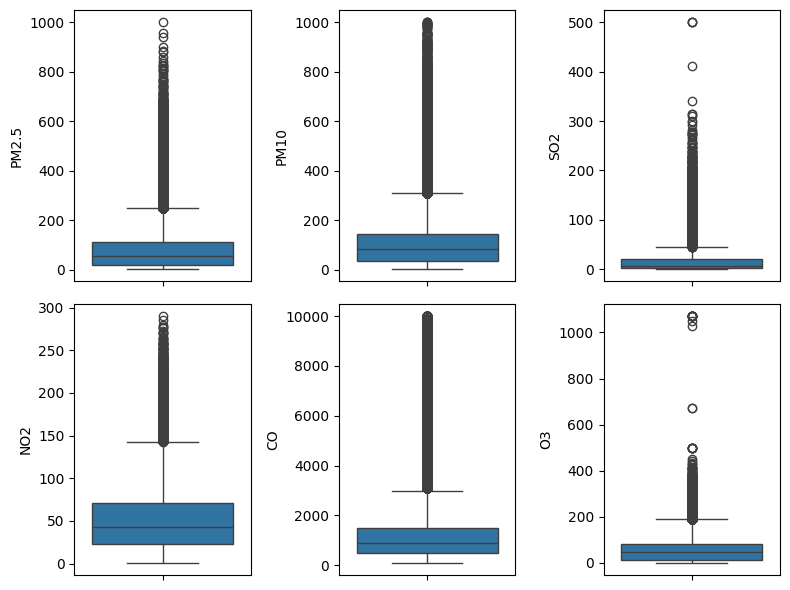

In [8]:
### Checking Outlier
fig, axes = plt.subplots(2,3, figsize = (8,6))
sns.boxplot(y=df_raw["PM2.5"], ax=axes[0,0])
sns.boxplot(y=df_raw["PM10"], ax=axes[0,1])
sns.boxplot(y=df_raw["SO2"], ax=axes[0,2])
sns.boxplot(y=df_raw["NO2"], ax=axes[1,0])
sns.boxplot(y=df_raw["CO"], ax=axes[1,1])
sns.boxplot(y=df_raw["O3"], ax=axes[1,2])
fig.tight_layout()


### Cleaning Data

In [9]:
### Drop feature wd/winddirection karna tidak diperlukan
df_raw.drop(['wd'], axis=1, inplace = True)


In [10]:
# Handling Outlier
outlier_feature = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

Q1 = df_raw[outlier_feature].quantile(0.25)
Q3 = df_raw[outlier_feature].quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5 * IQR)
minimum = Q1 - (1.5 * IQR)
for col in outlier_feature:
    kondisi_lower_than = df_raw[col] < minimum[col]
    kondisi_more_than = df_raw[col] > maximum[col]

    df_raw[col] = df_raw[col].mask(kondisi_more_than, maximum[col])
    df_raw[col] = df_raw[col].mask(kondisi_lower_than, minimum[col])

In [11]:
### Handling Missing Value
### Karena datanya berupa time series, kita menggunakan interpolate linear
df_raw = df_raw.interpolate(method='linear', limit_direction='forward')

**Insight:**
- Outlier : Menggunakan library di dalam pandas, yakni **mask**
- Missing Value : Menggunakan **Interpolate** karena datanya berupa time series

## Exploratory Data Analysis (EDA)

### Explore df_raw

In [12]:
### Rename n change datatype
df_raw['datetime'] = pd.to_datetime(df_raw[['year', 'month', 'day', 'hour']])

# Mengubah tipe data ke categorical
df_raw['year'] = df_raw.year.astype('category')
df_raw['month'] = df_raw.month.astype('category')
df_raw['day'] = df_raw.day.astype('category')
df_raw['hour'] = df_raw.hour.astype('category')

df_raw.rename(columns={
    'TEMP': 'temperature',
    'PRES': 'pressure',
    'DEWP': 'dew_point',
    'RAIN' : 'rain',
    'WSPM' : 'windspeed',
}, inplace=True)

#### Mengategorikan hal & Menemukan Sesuatu Yang Tidak Biasa

In [13]:
### Nilai Maksimum, Minimum, Mean, dan Sum dari Polutan PM2.5 dan PM10 di tiap taun dan tiap station 
df_raw.groupby(["station", "year"]).agg({
    "PM2.5": ["max", "min", "mean", "sum"],
    "PM10": ["max", "min", "mean", "sum"]
}).reset_index()


station  year  PM2.5                                  PM10       \
                           max  min       mean            sum    max  min   
0    Aotizhongxin  2013  247.5  3.0  80.266374  589476.250000  308.5  2.0   
1    Aotizhongxin  2014  247.5  3.0  85.051142  745048.000000  308.5  3.0   
2    Aotizhongxin  2015  247.5  3.0  77.155354  675880.900000  308.5  3.0   
3    Aotizhongxin  2016  247.5  3.0  71.010417  623755.500000  308.5  4.0   
4    Aotizhongxin  2017  247.5  3.0  82.907133  117396.500000  308.5  3.0   
5       Changping  2013  247.5  2.0  71.204112  522923.000000  308.5  2.0   
6       Changping  2014  247.5  3.0  76.727374  672131.800000  308.5  3.0   
7       Changping  2015  247.5  3.0  66.854897  585648.900000  308.5  3.0   
8       Changping  2016  247.5  3.0  60.041012  527400.250000  308.5  3.0   
9       Changping  2017  247.5  3.0  73.599223  104216.500000  308.5  5.0   
10       Dingling  2013  247.5  3.0  64.305556  472260.000000  308.5  2.0   
11       Dingling  2014  247.5  3.0  71.754279  628567.483333  308.5  3.0   
12       Dingling  2015  247.5  3.0  62.119391  544165.866667  308.5  3.0   
13       Dingling  2016  247.5  3.0  59.152436  519595.000000  308.5  3.0   
14       Dingling  2017  247.5  3.0  65.849929   93243.500000  308.5  3.0   
15         Dongsi  2013  247.5  3.0  84.154208  618028.500000  308.5  2.0   
16         Dongsi  2014  247.5  3.0  83.597283  732312.200000  308.5  3.0   
17         Dongsi  2015  247.5  3.0  80.848236  708230.550000  308.5  3.0   
18         Dongsi  2016  247.5  3.0  75.956825  667204.750000  308.5  5.0   
19         Dongsi  2017  247.5  3.0  88.014831  124629.000000  308.5  5.0   
20       Guanyuan  2013  247.5  3.0  79.702682  585336.500000  308.5  2.0   
21       Guanyuan  2014  247.5  3.0  84.161889  737258.150000  308.5  3.0   
22       Guanyuan  2015  247.5  3.0  77.402900  678049.400000  308.5  3.0   
23       Guanyuan  2016  247.5  3.0  73.705430  647428.500000  308.5  3.0   
24       Guanyuan  2017  247.5  2.0  84.990996  120347.250000  308.5  4.0   
25        Gucheng  2013  247.5  2.0  79.660335  585025.500000  308.5  2.0   
26        Gucheng  2014  247.5  3.0  85.976433  753153.550000  308.5  3.0   
27        Gucheng  2015  247.5  3.0  78.342814  686283.050000  308.5  3.0   
28        Gucheng  2016  247.5  3.0  73.776412  648052.000000  308.5  3.0   
29        Gucheng  2017  247.5  3.0  86.748588  122836.000000  308.5  5.0   
30        Huairou  2013  247.5  2.0  67.656318  496868.000000  308.5  2.0   
31        Huairou  2014  247.5  3.0  74.867745  655841.450000  308.5  3.0   
32        Huairou  2015  247.5  3.0  67.910908  594899.550000  308.5  3.0   
33        Huairou  2016  247.5  3.0  59.187443  519902.500000  308.5  3.0   
34        Huairou  2017  247.5  2.0  69.211511   98003.500000  308.5  3.0   
35   Nongzhanguan  2013  247.5  3.0  81.729541  600221.750000  308.5  2.0   
36   Nongzhanguan  2014  247.5  3.0  85.444772  748496.200000  308.5  3.0   
37   Nongzhanguan  2015  247.5  3.0  79.271050  694414.400000  308.5  3.0   
38   Nongzhanguan  2016  247.5  3.0  72.647655  638137.000000  308.5  3.0   
39   Nongzhanguan  2017  247.5  2.0  87.234110  123523.500000  308.5  4.0   
40         Shunyi  2013  247.5  3.0  73.917824  542852.500000  308.5  2.0   
41         Shunyi  2014  247.5  3.0  81.675029  715473.250000  308.5  3.0   
42         Shunyi  2015  247.5  3.0  76.423299  669468.100000  308.5  3.0   
43         Shunyi  2016  247.5  3.0  68.738872  603802.250000  308.5  3.0   
44         Shunyi  2017  247.5  2.0  83.295551  117946.500000  308.5  3.0   
45        Tiantan  2013  247.5  3.0  80.943253  594447.250000  308.5  2.0   
46        Tiantan  2014  247.5  3.0  83.142471  728328.050000  308.5  3.0   
47        Tiantan  2015  247.5  3.0  77.269914  676884.450000  308.5  3.0   
48        Tiantan  2016  247.5  3.0  70.784836  621774.000000  308.5  3.0   
49        Tiantan  2017  247.5  3.0  85.711864  121368.000000  308.5  5.0   
50    

**Insight:**
- Terlihat kemiripan di beberapa station dari nilai sum yang ada, terlihat **pada tahun 2013 dan 2017 dibawah nilai rata2** tiap tahun karena **terpengaruh dari data yang diambil 2013 hanya 10 bulan dan 2017 hanya 2 bulan**
- Nilai Tertinggi Terlihat pada tahun 2014

#### Menemukan Pola

In [14]:
# Combine PM2.5 and PM10 using the average
mean = df_raw[['PM2.5', 'PM10']].mean(axis=1)

# Apply qcut to the average values
df_raw['PolutanCondition'] = pd.qcut(mean, q=3, labels=['good', 'medium', 'bad'])

In [15]:
### Clustering Polutan Condition Each Month
df_raw.groupby('month')['PolutanCondition'].value_counts()

month  PolutanCondition
1      bad                 13749
       good                13361
       medium               8602
2      good                14354
       bad                 10928
       medium               7262
3      bad                 16913
       good                10189
       medium               8610
4      medium              13626
       bad                 13287
       good                 7647
5      medium              16269
       bad                 10530
       good                 8913
6      medium              14005
       good                11213
       bad                  9342
7      medium              15839
       good                10436
       bad                  9437
8      good                14871
       medium              14641
       bad                  6200
9      good                13737
       medium              12612
       bad                  8211
10     bad                 13249
       good                11607
       medium      

**Insight:**
- Terlihat kondisi cuaca yang tersebar merata namun terlihat pola, berikut hasil analisanya:
  kondisi kualitas polutan rendah(good) bulan 6 - 9;
  kondisi kualitas polutan buruk(bad) bulan 10 - 3;
  kondisi kualitas polutan sedang(medium) bulan 4 - 5;

#### Menemukan Korelasi/Hubungan

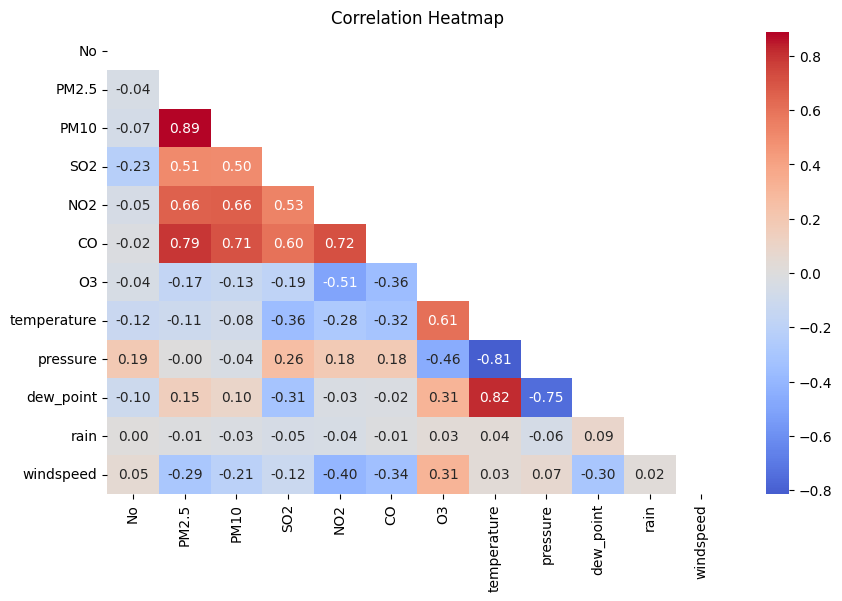

In [16]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = df_raw.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


**Insight:**
- Terlihat beberapa hubungan/korelasi antar feature yang saling mempengaruhi
    - **Relasi Kuat Positif**: (PM2.5 Terhadap PM10,SO2,NO2,CO), (PM10 Terhadap SO2,NO2,CO), (O3 Terhadap Temperature)dll.
    - **Relasi Kuat Negatif**: (O3 Terhadap NO2, Pressure), (Pressure Terhadap Temperature, DewPoint), dll
    - **Tidak berhubungan** : (rain dan windspeed), (dew_point dengan rain), dll

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah Ketika hujan mengurangi jumlah polutan?

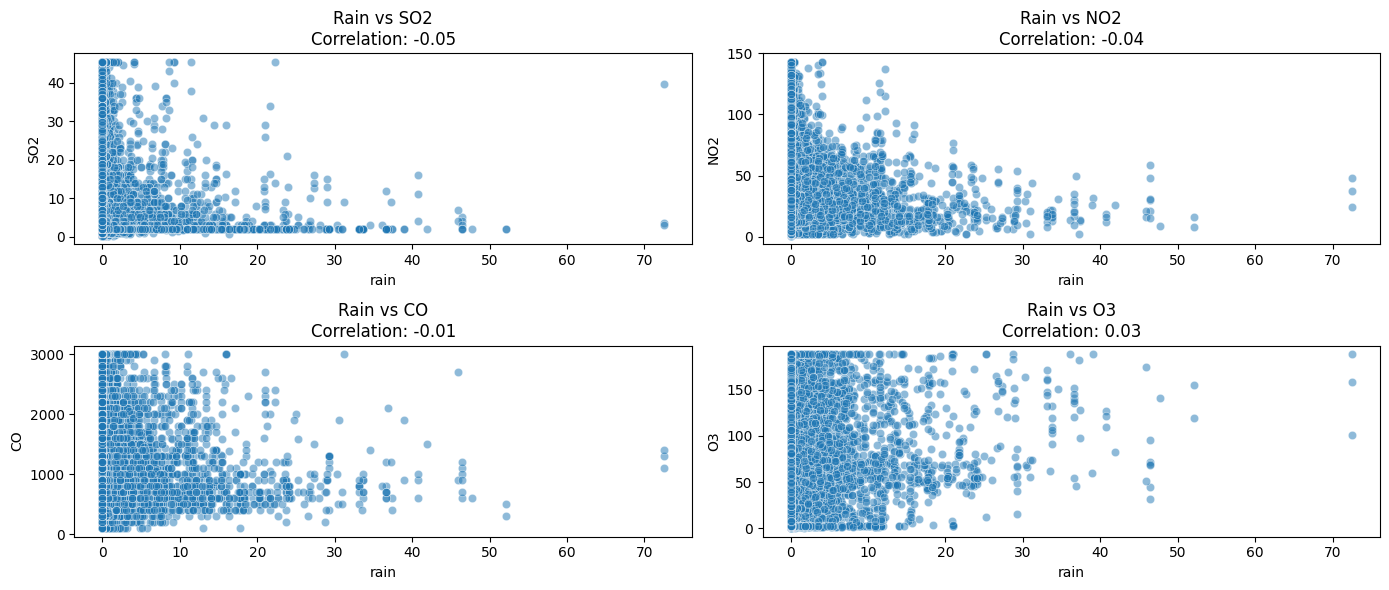

In [17]:
corr_SO2 = df_raw['rain'].corr(df_raw['SO2'])
corr_NO2 = df_raw['rain'].corr(df_raw['NO2'])
corr_CO = df_raw['rain'].corr(df_raw['CO'])
corr_O3 = df_raw['rain'].corr(df_raw['O3'])

plt.figure(figsize=(14, 6))

# plot "rain" vs "SO2"
plt.subplot(2, 2, 1)
sns.scatterplot(x='rain', y='SO2', data=df_raw, alpha=0.5)
plt.title(f'Rain vs SO2\nCorrelation: {corr_SO2:.2f}')

# plot "rain" vs "NO2"
plt.subplot(2, 2, 2)
sns.scatterplot(x='rain', y='NO2', data=df_raw, alpha=0.5)
plt.title(f'Rain vs NO2\nCorrelation: {corr_NO2:.2f}')

# plot "rain" vs "CO"
plt.subplot(2, 2, 3)
sns.scatterplot(x='rain', y='CO', data=df_raw, alpha=0.5)
plt.title(f'Rain vs CO\nCorrelation: {corr_CO:.2f}')

# plot "rain" vs "O3"
plt.subplot(2, 2, 4)
sns.scatterplot(x='rain', y='O3', data=df_raw, alpha=0.5)
plt.title(f'Rain vs O3\nCorrelation: {corr_O3:.2f}')

plt.tight_layout()
plt.show()


### Pertanyaan 2 & 3 : Bagaimana Peningkatan Frequency Rata-rata PM2.5 di sekitar Sebulan Terakhir, 6 bulan terakhir, 1 tahun terakhir, 5 tahun terakhir


In [18]:
# Tentukan tanggal tertentu (misalnya, '2017-02-28 23:00:00')
last_day = pd.Timestamp('2017-02-28 23:00:00')

# Filter data untuk setiap periode
df_last_month = df_raw[df_raw['datetime'] >= last_day - pd.DateOffset(months=1)]
df_last_6_months = df_raw[df_raw['datetime'] >= last_day - pd.DateOffset(months=6)]
df_last_year = df_raw[df_raw['datetime'] >= last_day - pd.DateOffset(years=1)]
df_last_5_years = df_raw[df_raw['datetime'] >= last_day - pd.DateOffset(years=5)]

# Resample data
# Last Month
daily_frequency_df = df_last_month.resample(rule='D', on='datetime').agg({
    "PM2.5": "mean",
    "PM10": "mean"
})
daily_frequency_df = daily_frequency_df.reset_index()

# Last 6 Months
weekly_frequency_df = df_last_6_months.resample(rule='W', on='datetime').agg({
    "PM2.5": "mean",
    "PM10": "mean"
})
weekly_frequency_df = weekly_frequency_df.reset_index()

# Last Year
monthly_frequency_df = df_last_year.resample(rule='M', on='datetime').agg({
    "PM2.5": "mean",
    "PM10": "mean"
})
monthly_frequency_df = monthly_frequency_df.reset_index()

# Last 5 Years
yearly_frequency_df = df_last_5_years.resample(rule='Y', on='datetime').agg({
    "PM2.5": "mean",
    "PM10": "mean"
})
yearly_frequency_df = yearly_frequency_df.reset_index()

#### Visualisasi Pertanyaan ke 2

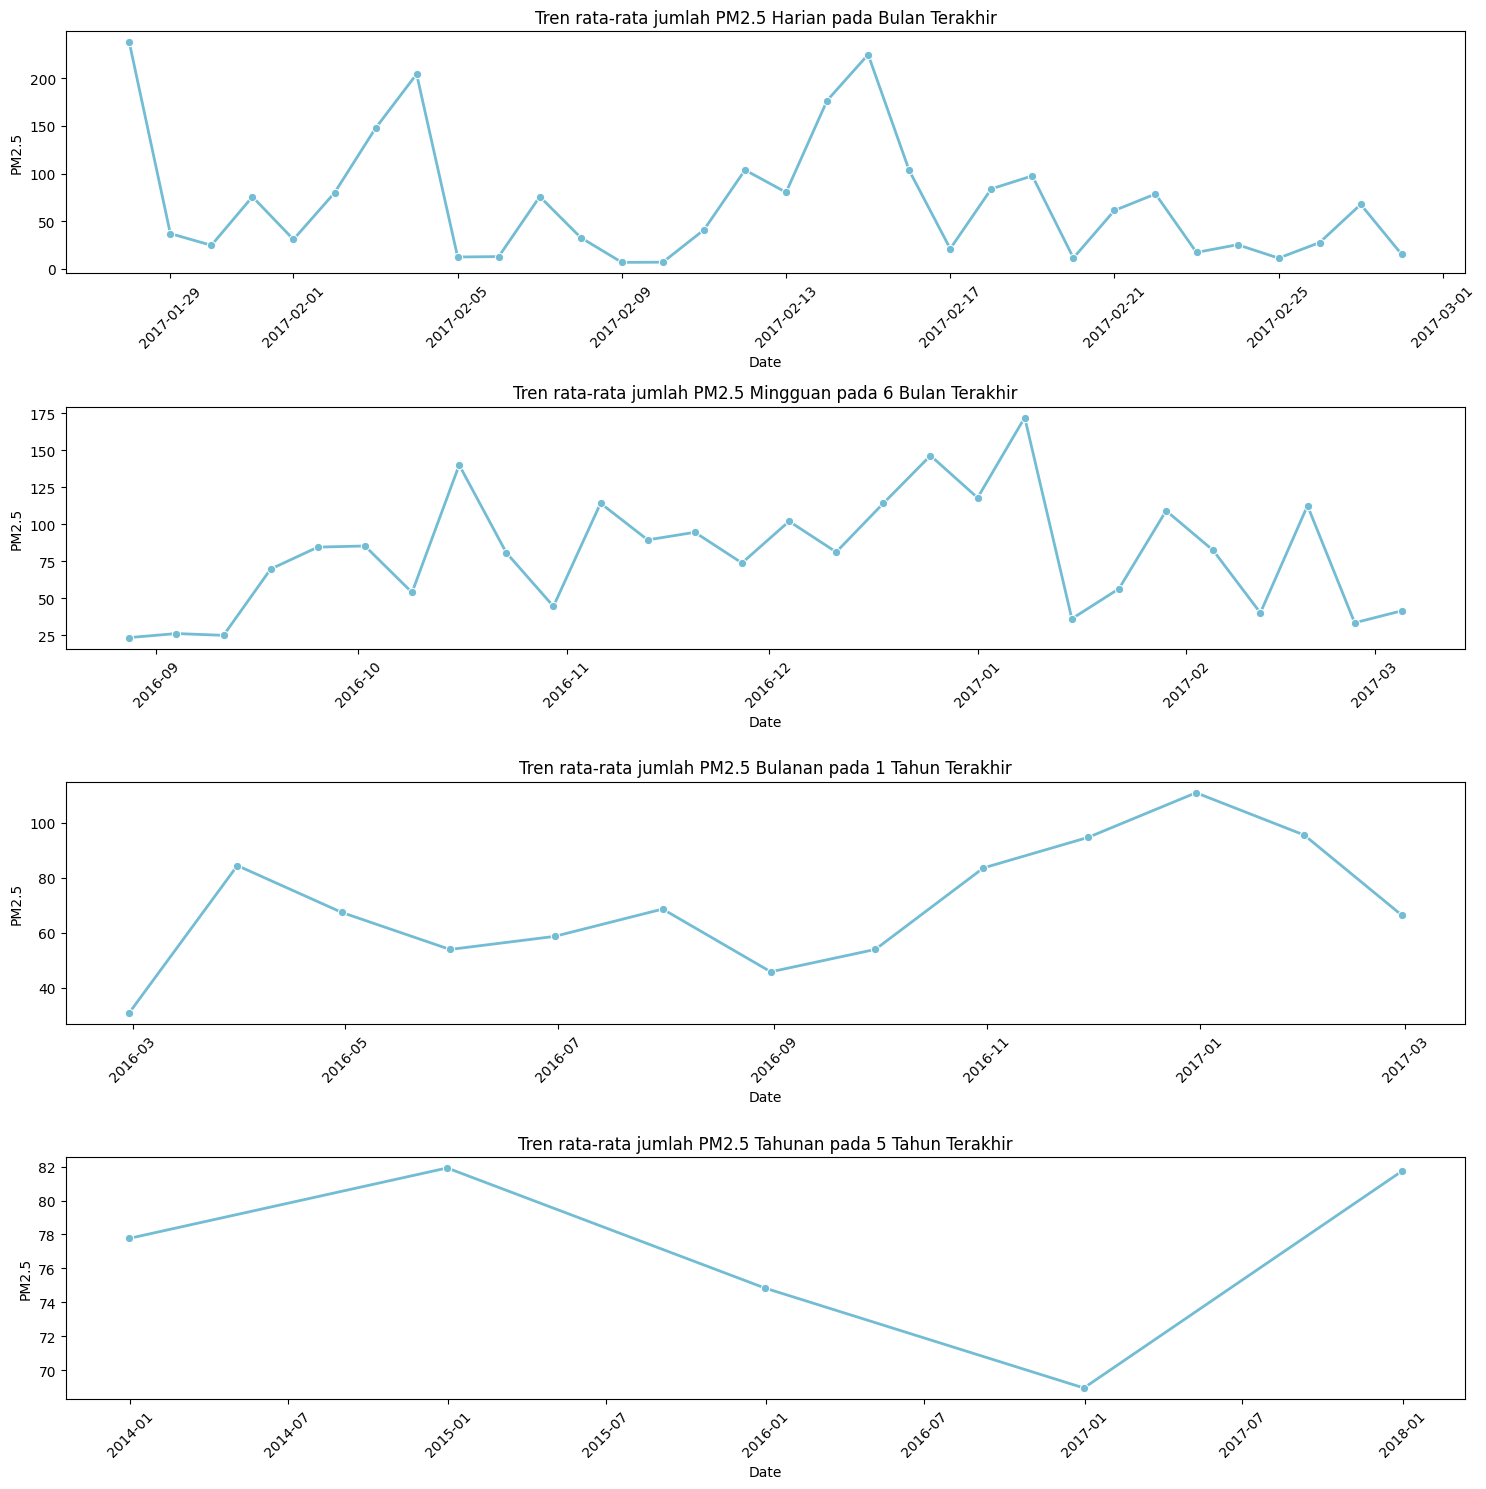

In [19]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 15))

# Daily frequency plot
sns.lineplot(x='datetime', y='PM2.5', data=daily_frequency_df, marker='o', linewidth=2, color="#72BCD4", ax=axes[0])
axes[0].set_title('Tren rata-rata jumlah PM2.5 Harian pada Bulan Terakhir')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('PM2.5')
axes[0].tick_params(axis='x', rotation=45)

# Weekly frequency plot
sns.lineplot(x='datetime', y='PM2.5', data=weekly_frequency_df, marker='o', linewidth=2, color="#72BCD4", ax=axes[1])
axes[1].set_title('Tren rata-rata jumlah PM2.5 Mingguan pada 6 Bulan Terakhir')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('PM2.5')
axes[1].tick_params(axis='x', rotation=45)

# Monthly frequency plot
sns.lineplot(x='datetime', y='PM2.5', data=monthly_frequency_df, marker='o', linewidth=2, color="#72BCD4", ax=axes[2])
axes[2].set_title('Tren rata-rata jumlah PM2.5 Bulanan pada 1 Tahun Terakhir')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('PM2.5')
axes[2].tick_params(axis='x', rotation=45)

# Yearly frequency plot
sns.lineplot(x='datetime', y='PM2.5', data=yearly_frequency_df, marker='o', linewidth=2, color="#72BCD4", ax=axes[3])
axes[3].set_title('Tren rata-rata jumlah PM2.5 Tahunan pada 5 Tahun Terakhir')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('PM2.5')
axes[3].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Terlihat dari hasil visualisasi analisis, terdapat beberapa hasil yang menarik

1. Pada data harian di 1 bulan terakhir : tidak nampak pola yang signifikan, namun terlihat **ada 3 kali lonjakan rata-rata nilai PM2.5 diatas 200** nilainya
2. Pada data mingguan di 6 bulan terakhir : terlihat di data mingguan periode bulan ke-9(September) 2016, terdapat nilai PM2.5 yang dibawah 25, namun setelah itu ada kecenderungan naik, dan puncaknya minggu menjelang awal tahun 2017 ada kenaikan. Lalu turun di minggu kedua bulan januari 2017, **ini menyiratkan kemungkinan polusi berasal dari libur akhir tahun, yang meningkatkan volume penggunaan kereta dan kendaraan lain disekitar stasiun**
3. Pada data Bulanan di 1 tahun terakhir : terlihat ada nya sedikit pola yang terlihat, yakni mulai dari bulan ke 9 di 2016. Mengonfirmasi visualisasi data sebelumnya di rentang yang sama. **Terlihat ada peningkatan hingga awal tahun lalu melandai kembali**.
4. Pada data tahunan di 5 tahun terakhir : Terlihat data selama **5 tahun kebelakang tersebar merata** dilihat dari titik terpuncak tahun 2014 hingga titik terendah di tahun 2016 hanya berbeda 12 nilai saja.

#### Visualisasi Pertanyaan ke 3

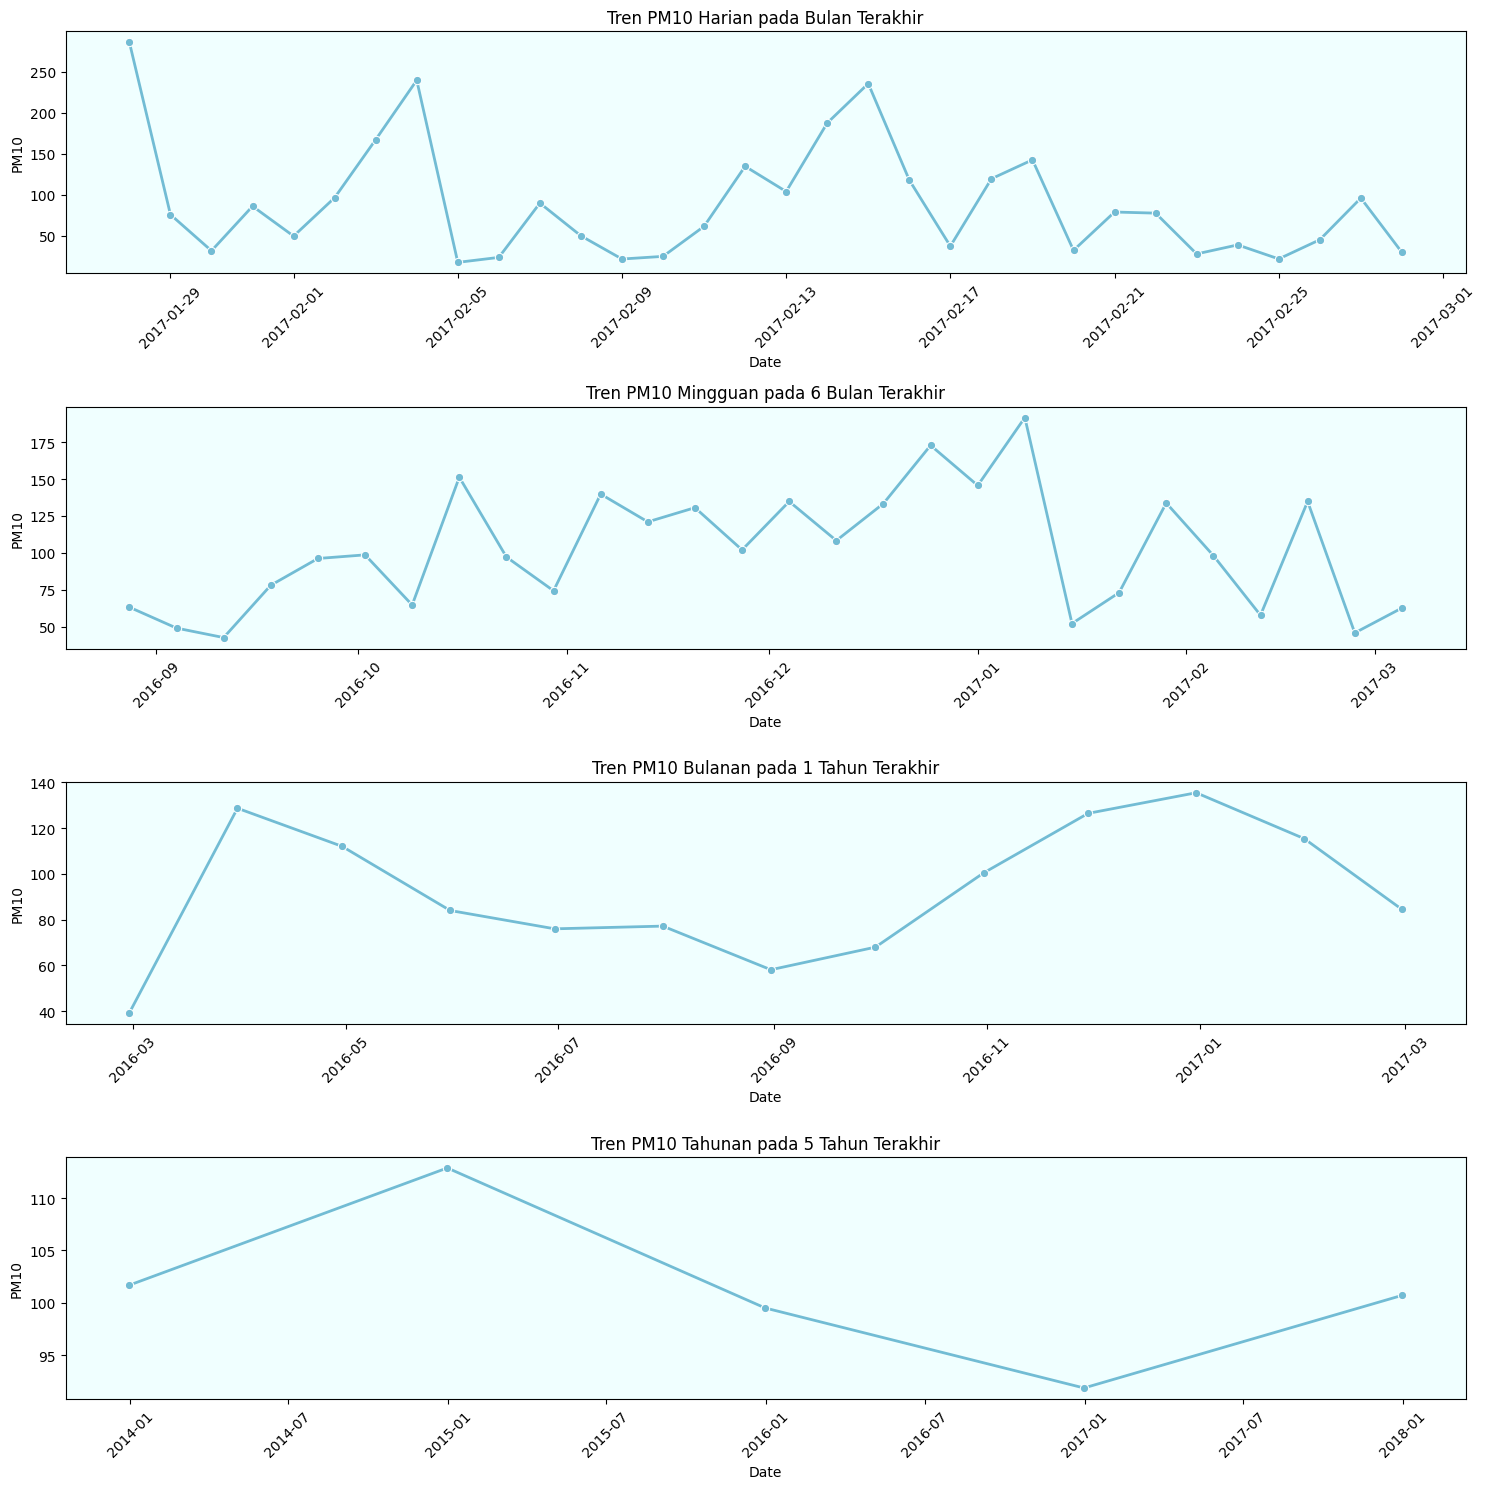

In [20]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 15))

# Set background color for each axis
for ax in axes:
    ax.set_facecolor('grey')

# Daily frequency plot
sns.lineplot(x='datetime', y='PM10', data=daily_frequency_df, marker='o', linewidth=2, color="#72BCD4", ax=axes[0])
axes[0].set_title('Tren PM10 Harian pada Bulan Terakhir')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('PM10')
axes[0].set_facecolor('#F0FFFF')
axes[0].tick_params(axis='x', rotation=45)

# Weekly frequency plot
sns.lineplot(x='datetime', y='PM10', data=weekly_frequency_df, marker='o', linewidth=2, color="#72BCD4", ax=axes[1])
axes[1].set_title('Tren PM10 Mingguan pada 6 Bulan Terakhir')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('PM10')
axes[1].set_facecolor('#F0FFFF')
axes[1].tick_params(axis='x', rotation=45)

# Monthly frequency plot
sns.lineplot(x='datetime', y='PM10', data=monthly_frequency_df, marker='o', linewidth=2, color="#72BCD4", ax=axes[2])
axes[2].set_title('Tren PM10 Bulanan pada 1 Tahun Terakhir')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('PM10')
axes[2].set_facecolor('#F0FFFF')
axes[2].tick_params(axis='x', rotation=45)

# Yearly frequency plot
sns.lineplot(x='datetime', y='PM10', data=yearly_frequency_df, marker='o', linewidth=2, color="#72BCD4", ax=axes[3])
axes[3].set_title('Tren PM10 Tahunan pada 5 Tahun Terakhir')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('PM10')
axes[3].set_facecolor('#F0FFFF')
axes[3].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Terlihat dari hasil visualisasi analisis, terdapat beberapa hasil yang cukup identik dari hasil PM2.5.
Yang paling menarik adalah;

- pada data bulanan di 1 tahun terakhir terlihat pola yang jelas, bahwa terjadi **siklus naik turun sebanyak 2 kali** dan kondisi titik puncak yang tidak berbeda jauh nilainya.

### Pertanyaan 4 : Bulan apa yang memiliki jumlah polutan (SO2,NO2,CO,O3) tertinggi

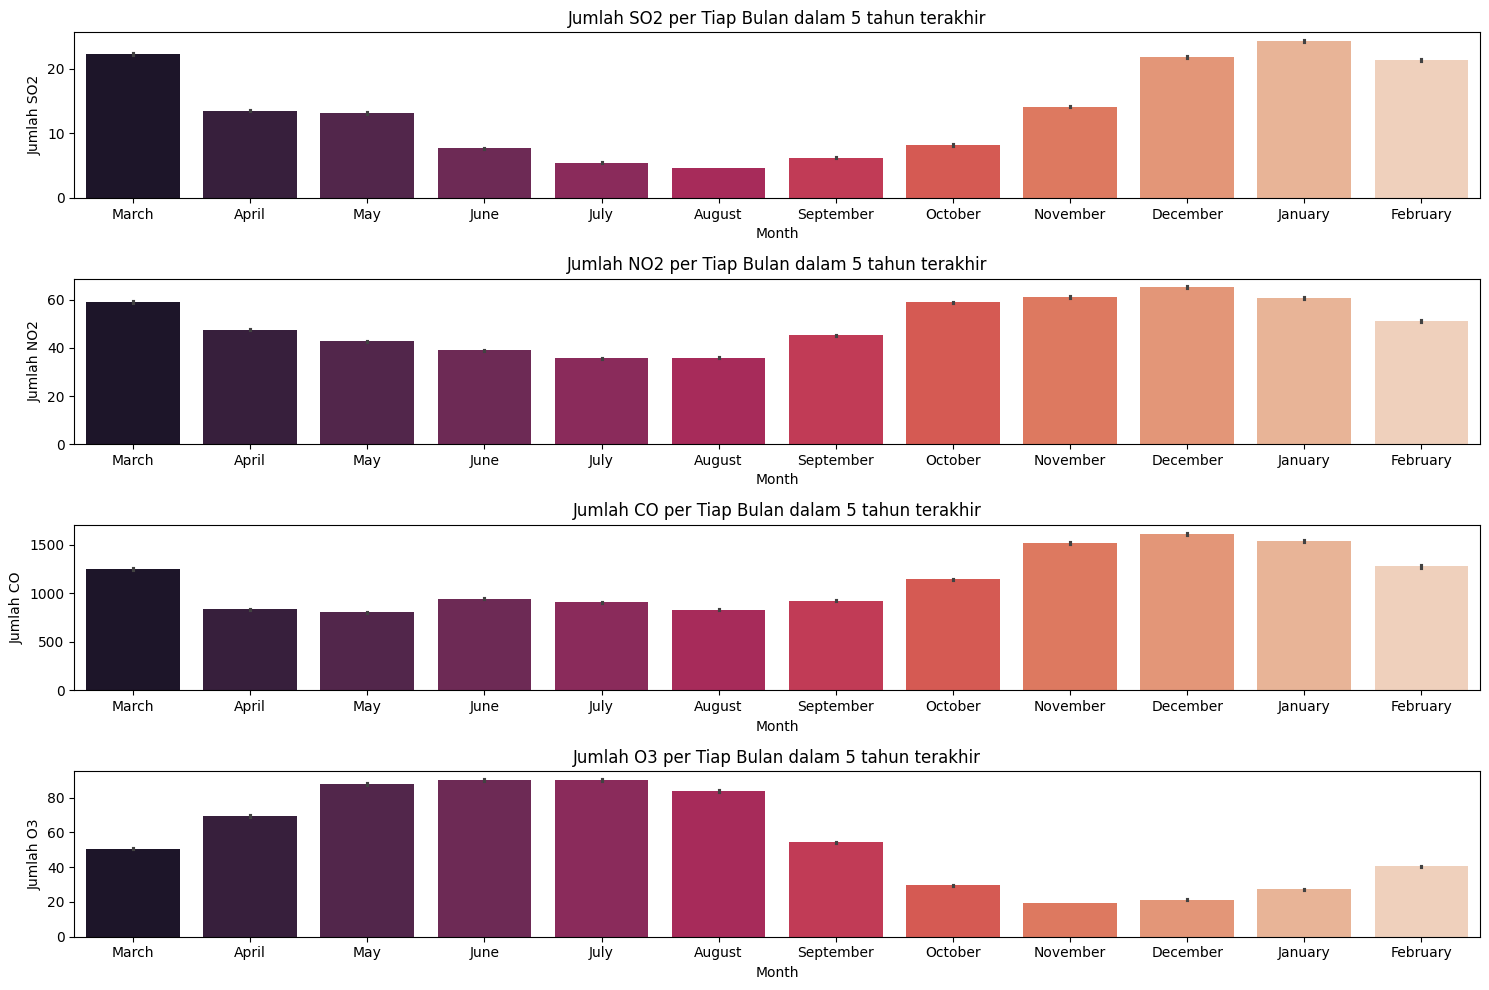

In [21]:
#add column month name for better visualization
df_raw['month_name'] = pd.to_datetime(df_raw['month'], format='%m').dt.strftime('%B')

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15,10))

sns.barplot(
  x='month_name',
  y='SO2',
  data=df_raw,
  palette='rocket',
  ax=axes[0])
axes[0].set_title('Jumlah SO2 per Tiap Bulan dalam 5 tahun terakhir')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Jumlah SO2')


sns.barplot(
  x='month_name',
  y='NO2',
  data=df_raw,
  palette='rocket',
  ax=axes[1])
axes[1].set_title('Jumlah NO2 per Tiap Bulan dalam 5 tahun terakhir')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Jumlah NO2')

sns.barplot(
  x='month_name',
  y='CO',
  data=df_raw,
  palette='rocket',
  ax=axes[2])
axes[2].set_title('Jumlah CO per Tiap Bulan dalam 5 tahun terakhir')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Jumlah CO')

sns.barplot(
  x='month_name',
  y='O3',
  data=df_raw,
  palette='rocket',
  ax=axes[3])
axes[3].set_title('Jumlah O3 per Tiap Bulan dalam 5 tahun terakhir')
axes[3].set_xlabel('Month')
axes[3].set_ylabel('Jumlah O3')

plt.tight_layout()
plt.show()


Hasil dari visualisasi ini menemukan beberapa fakta baru berdasarkan data yang ada, berikut hasil analisa saya:

1. Fakta pertama, adalah **3 Polutan(SO2,NO2,CO) sangat memengaruhi O3, terutama hubungan O3 dengan NO2.** Dimana ketika 3 Polutan ini bernilai tinggi, maka O3 berbanding terbalik dengan ketiganya.
2. Fakta kedua, dalam **periode satu tahun 3 Polutan ini memiliki tren yang sama**, titik terendah di bulan agustus lalu berangsur meningkat pada sekitar bulan Desember - Januari lalu menurun kembali hingga kembali ke agustus.
3. Fakta ketiga, Untuk **O3 ini terlihat jelas berbanding terbalik dengan ketiganya bahwa titik terendahnya di sekitar bulan November - Desember**, lalu meningkat pada sekitar bulan Juni-Juli

**Insight:**
- Dalam Hasil Analisa yang didapat terlihat beberapa pola dan tren yang terlihat, namun perlu digaris bawahi, data tersebut merupakan data yang sudah dicampur tangan oleh proses cleaning data. Perlu analisa lebih mendalam apakah data tersebut merupakan hasil yang kebenarannya bisa diuji
- Berdasarkan data, tidak adanya hubungan yang kuat antara hujan dengan tingkat polutan. Namun seperti yang kita ketahui saat hujan akan meningkatkan kualitas udara daerah tersebut, dan "mencuci" sebagian polutan kotor.
- Insight lainnya selama 5 tahun terakhir tidak adanya peningkatan ataupun penurunan tiap tahunnya secara signifikan, dan terlihat dari data tersebut justru kondisinya Frequency Polutannya merata tiap tahunnya.

## Analisis Lanjutan (Opsional)

### Clustering | Polutan Condition berdasarkan tiap stasiun

Sebelumnya kita sudah membuat clustering PolutanCondition Tiap Bulannya. Kita Perlu ingat kolom PolutanCondition dipengaruhi dari variable PM2.5 dan PM10 di tiap jam

In [22]:
bystation_df = df_raw[df_raw['PolutanCondition'] == 'bad'].groupby('station').count().reset_index()
bystation_df.drop(['No', 'year', 'month', 'day','hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'temperature', 'pressure', 'dew_point', 'rain', 'windspeed', 'datetime', 'month_name'], axis=1, inplace=True)
bystation_df

,station,PolutanCondition
0,Aotizhongxin,12322
1,Changping,10019
2,Dingling,8897
3,Dongsi,12496
4,Guanyuan,12300
5,Gucheng,13668
6,Huairou,9936
7,Nongzhanguan,12150
8,Shunyi,11134
9,Tiantan,11677


Text(0.5, 0, 'When PolutanCondition are Bad')

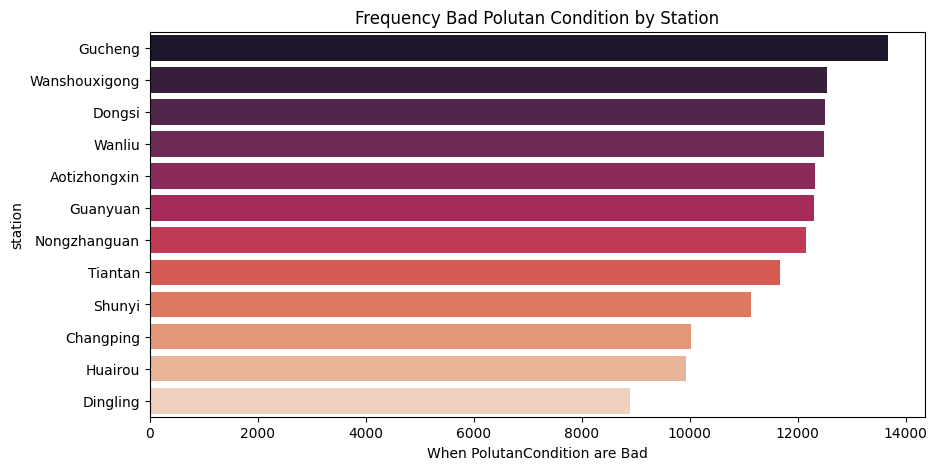

In [23]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x="PolutanCondition", 
    y="station",
    data=bystation_df.sort_values(by="PolutanCondition", ascending=False),
    palette="rocket"
)
plt.title("Frequency Bad Polutan Condition by Station", loc="center")
plt.xlabel("When PolutanCondition are Bad")

Terlihat berdasarkan **frequency PolutanCondition di station yang bernilai bad, terbanyak dimiki Gucheng, Wanshouxigong, Dongsi, dst.**
artinya adalah **di stasiun tersebut bisa dikatakan sering terjadi polusi tingkat tinggi, yang mana merupakan jumlah dari banyaknya PM2.5 dan PM10**

### RFM Analysis

- Recency: parameter yang digunakan untuk melihat kapan terakhir *station* bernilai danger terhadap SO2.
- Frequency: parameter ini digunakan untuk mengidentifikasi seberapa sering station kedapatan bernilai danger terhadap SO2.
- Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar jumlah SO2 yang berasal dari *station* tersebut.

In [24]:
df_raw['SO2Condition'] = pd.qcut(df_raw['SO2'], q=3, labels=['nice', 'severe', 'danger'])
df_when_danger = df_raw[df_raw['SO2Condition'] == 'danger']

rfm_df = df_when_danger.groupby(by="station").agg({
    "datetime": "max",  
    "SO2": "sum"  
})

# Mengganti nama kolom hasil agregasi
rfm_df.columns = ["last_danger_timestamp", "monetary"]

# Tambahkan kolom 'frequency' yang menghitung jumlah kejadian 'danger' per station
rfm_df['frequency'] = df_when_danger.groupby(by="station")['datetime'].count()

rfm_df.reset_index(inplace=True)

In [25]:
rfm_df["last_danger_timestamp"] = pd.to_datetime(rfm_df["last_danger_timestamp"])

# Get the most recent timestamp in the dataset
recent_timestamp = df_when_danger["datetime"].max()

# Calculate recency in hours
rfm_df["recency"] = (recent_timestamp - rfm_df["last_danger_timestamp"]).dt.total_seconds() / 3600

# Round to nearest hour if desired
rfm_df["recency"] = rfm_df["recency"].round()

# Drop the original last_danger_timestamp column if no longer needed
rfm_df.drop("last_danger_timestamp", axis=1, inplace=True)
rfm_df

,station,monetary,frequency,recency
0,Aotizhongxin,389002.912955,12578,12.0
1,Changping,326263.433410,10488,12.0
2,Dingling,255232.063175,8801,16.0
3,Dongsi,428113.104004,13670,20.0
4,Guanyuan,388534.963253,12283,29.0
5,Gucheng,352932.343549,11291,15.0
6,Huairou,261675.742989,8579,23.0
7,Nongzhanguan,416589.019789,13159,18.0
8,Shunyi,297915.342424,9599,0.0
9,Tiantan,307544.754220,10124,20.0


KeyError: 'recency_hours'

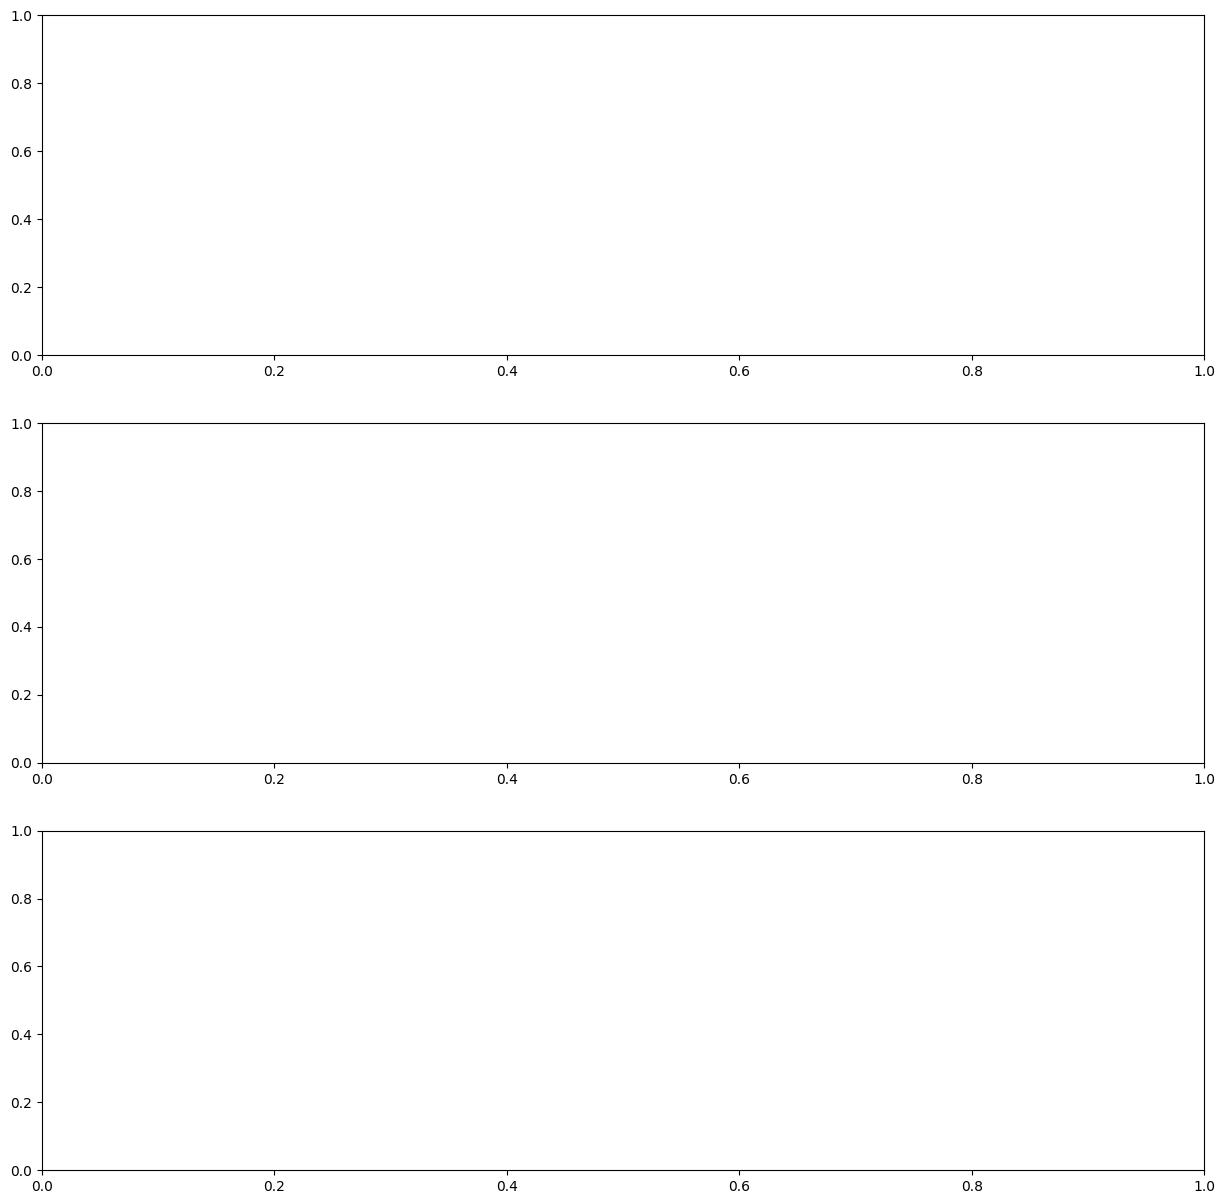

In [26]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))


sns.barplot(y="recency", x="station", data=rfm_df.sort_values(by="recency", ascending=True), palette='rocket', ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (hours)", loc="center")
ax[0].tick_params(axis ='x', rotation=45)

sns.barplot(y="frequency", x="station", data=rfm_df.sort_values(by="frequency", ascending=False), palette='rocket', ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center")
ax[1].tick_params(axis='x', rotation=45)

sns.barplot(y="monetary", x="station", data=rfm_df.sort_values(by="monetary", ascending=False), palette='rocket', ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center")
ax[2].tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4) 
plt.suptitle("Best station based on RFM Parameters ", fontsize=20)
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Bedasarkan **hasil visualisasi tidak ada hubungannya sama sekali**. Karna ketika curah hujan tinggi kadang menurunkan, kadang meninggikan dan yang paling mencolok adalah ketika rain tidak hujan tapi SO2 juga bisa mencapai titik terendahnya dan untuk Polutan NO2,CO,dan O3 Juga memiliki argumentasi yang sama seperti Hubungan Rain terhadap SO2. **Akan tetapi perlu di garis bawahi seperti yang kita tahu hujan bisa "membersihkan" kotoran2 polutan yang ada didaerah sekitarnya**

- Conclution pertanyaan 2 & 3 : Terlihat dari hasil visualisasi analisis, terdapat beberapa hasil yang menarik

    1. Pada data harian di 1 bulan terakhir : tidak nampak pola yang signifikan, namun terlihat **ada 3 kali lonjakan rata-rata nilai PM2.5 diatas 200** nilainya
    2. Pada data mingguan di 6 bulan terakhir : terlihat di data mingguan periode bulan ke-9(September) 2016, terdapat nilai PM2.5 yang dibawah 25, namun setelah itu ada kecenderungan naik, dan puncaknya minggu menjelang awal tahun 2017 ada kenaikan. Lalu turun di minggu kedua bulan januari 2017, **ini menyiratkan kemungkinan polusi berasal dari libur akhir tahun, yang meningkatkan volume penggunaan kereta dan kendaraan lain disekitar stasiun**
    3. Pada data Bulanan di 1 tahun terakhir : terlihat ada nya sedikit pola yang terlihat, yakni mulai dari bulan ke 9 di 2016. Mengonfirmasi visualisasi data sebelumnya di rentang yang sama. **Terlihat ada peningkatan hingga awal tahun lalu melandai kembali**.
    4. Pada data tahunan di 5 tahun terakhir : Terlihat data selama **5 tahun kebelakang tersebar merata** dilihat dari titik terpuncak tahun 2014 hingga titik terendah di tahun 2016 hanya berbeda 12 nilai saja.

- Conclution pertanyaan 4 : Hasil dari visualisasi ini menemukan beberapa fakta baru berdasarkan data yang ada, berikut hasil analisa saya:

    1. Fakta pertama, adalah **3 Polutan(SO2,NO2,CO) sangat memengaruhi O3, terutama hubungan O3 dengan NO2.** Dimana ketika 3 Polutan ini bernilai tinggi, maka O3 berbanding terbalik dengan ketiganya.
    2. Fakta kedua, dalam **periode satu tahun 3 Polutan ini memiliki tren yang sama**, titik terendah di bulan agustus lalu berangsur meningkat pada sekitar bulan Desember - Januari lalu menurun kembali hingga kembali ke agustus.
    3. Fakta ketiga, Untuk **O3 ini terlihat jelas berbanding terbalik dengan ketiganya bahwa titik terendahnya di sekitar bulan November - Desember**, lalu meningkat pada sekitar bulan Juni-Juli

### Hasil Analisis Lanjutan
- Clustering | Polutan Condition berdasarkan tiap stasiun : Terlihat berdasarkan **frequency PolutanCondition di station yang bernilai bad, terbanyak dimiki Gucheng, Wanshouxigong, Dongsi, dst.** artinya adalah **di stasiun tersebut bisa dikatakan sering terjadi polusi tingkat tinggi, yang mana merupakan jumlah dari banyaknya PM2.5 dan PM10**

- RFM Analysis :
    -Recency: parameter yang digunakan untuk melihat kapan terakhir station bernilai danger terhadap SO2.
    -Frequency: parameter ini digunakan untuk mengidentifikasi seberapa sering station kedapatan bernilai danger terhadap SO2.
    -Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar jumlah SO2 yang berasal dari station tersebut.

   1. Berdasarkan urutan Pertama terjadi(recency) polutan SO2 bernilai danger, **adalah autizhongxin sebagai yang pertama, Lalu Wanshouxigong sebagai yang terakhir terjadi keadaan danger beda 1 hari sebelumnya.**
   2. Berdasarkan *frequency* banyak kejadian SO2 bernilai danger ditempati **pada stasiun Dongsi, Wanliu, Nongzhangguan sebagai stasiun yang terbanyak mendekati 14000 kali situasi SO2 benilai danger.**
   3. Berdasarkan Jumlah(monetary) menghasilkan polusi SO2 bernilai danger tertinggi terjadi **di stasiun Dongsi dimana sebanyak diatas 400000 polutan SO2 bernilai danger yang dihasilkan**

In [ ]:
df_raw.to_csv('main.csv')
rfm_df.to_csv('rfm.csv')
bystation_df.to_csv('clustering.csv')